In [5]:
#!pip install dataprep

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
import os
import joblib
from dataprep.eda import *

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [41]:
df = pd.read_csv("/kaggle/input/hourly-energy-consumption/PJME_hourly.csv")
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [11]:
df.sample(10)

,Datetime,PJME_MW
59975,2008-02-27 14:00:00,35881.0
85422,2011-04-02 03:00:00,25741.0
22355,2004-06-13 17:00:00,28489.0
25386,2004-02-07 01:00:00,29042.0
2891,2002-09-02 13:00:00,28249.0
120421,2015-04-05 14:00:00,24473.0
119436,2015-05-16 13:00:00,29641.0
107995,2014-09-05 20:00:00,45523.0
98040,2013-10-24 01:00:00,24341.0
7568,2002-02-19 11:00:00,33407.0


In [43]:
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [19]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [23]:
df.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [42]:
df = df.set_index("Datetime")
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


<Axes: title={'center': 'Energy'}, xlabel='Datetime'>

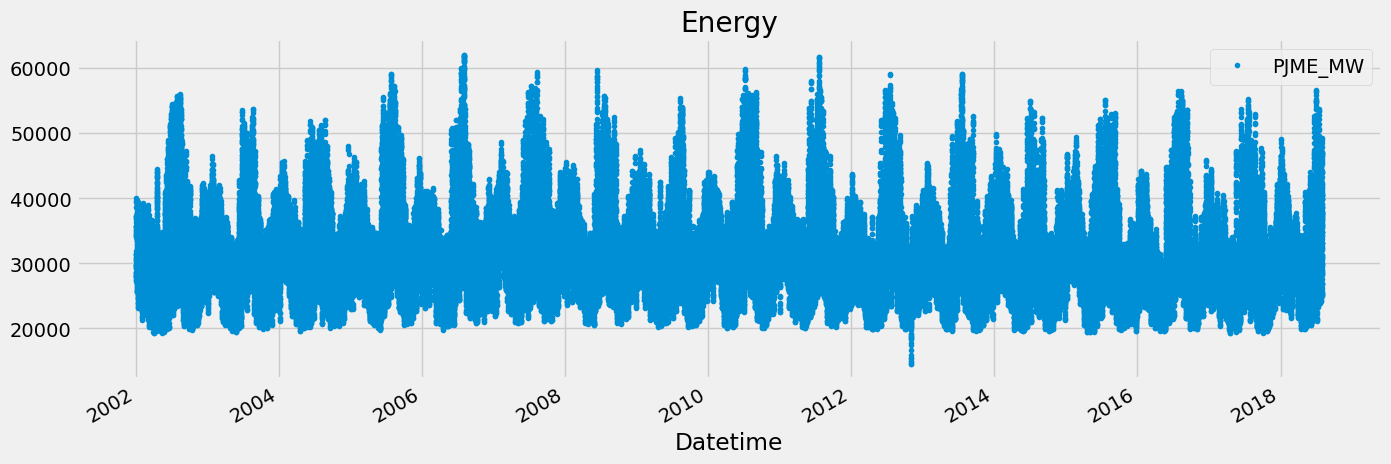

In [44]:
df.plot(figsize=(15,5),style='.',color=color_pal[0],title='Energy')

In [52]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["quarter"] = df.index.quarter
df["year"] = df.index.year
df["dayofyear"] = df.index.dayofyear
df

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'Energy Per Hour')

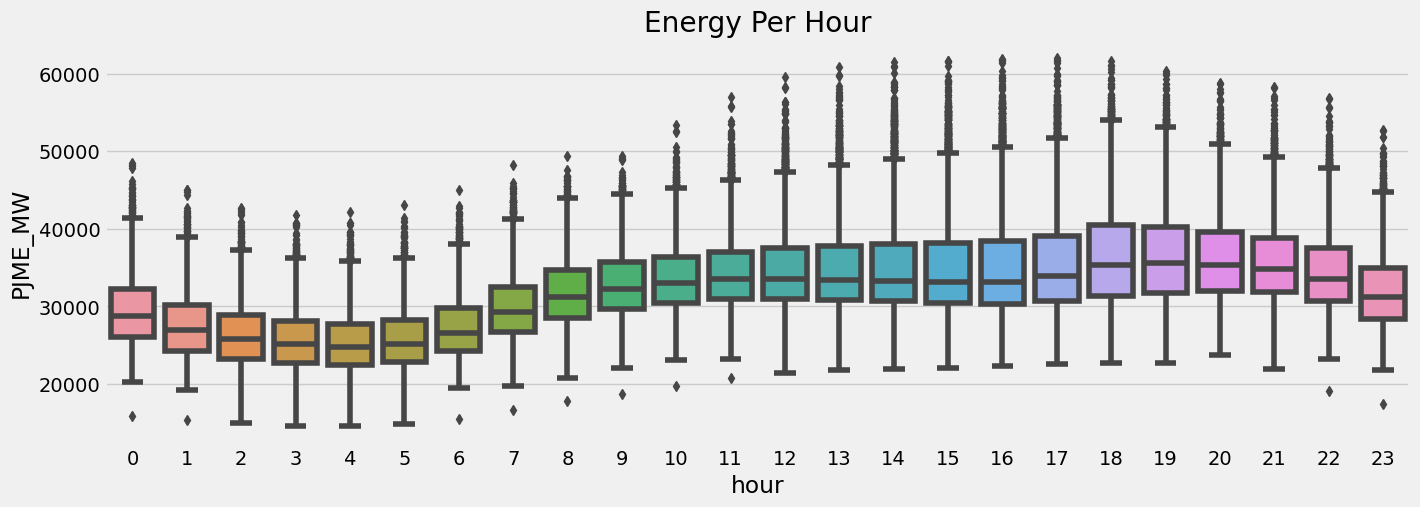

In [57]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='hour',y='PJME_MW')
plt.title('Energy Per Hour')

Text(0.5, 1.0, 'Energy Per Month')

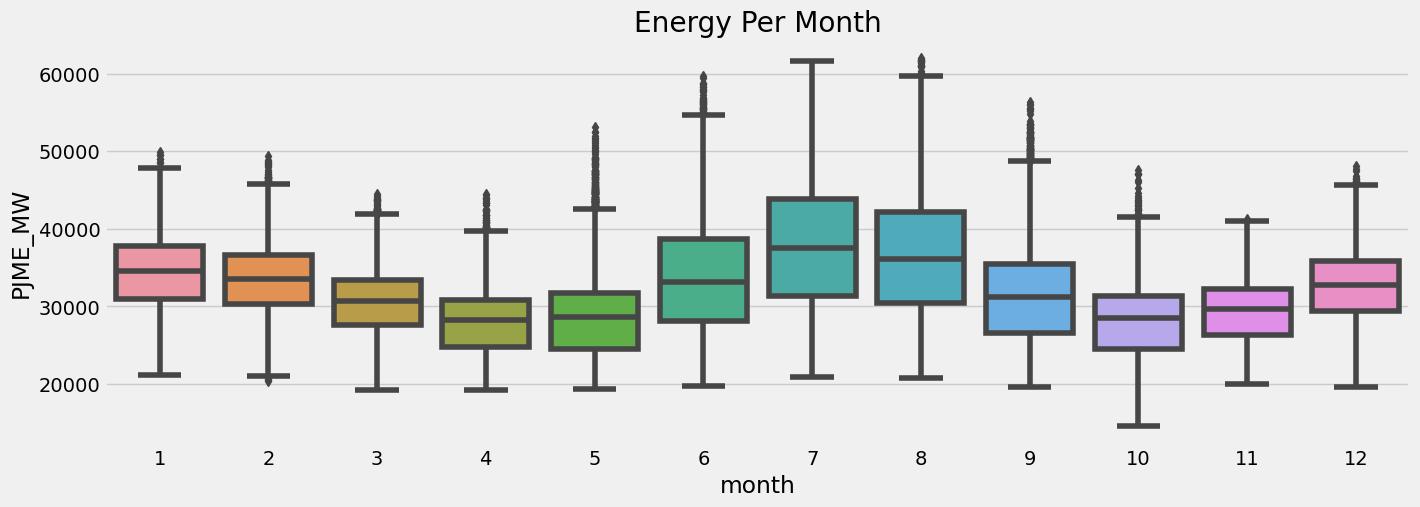

In [58]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='month',y='PJME_MW')
plt.title('Energy Per Month')

Text(0.5, 1.0, 'Energy Per Quarter')

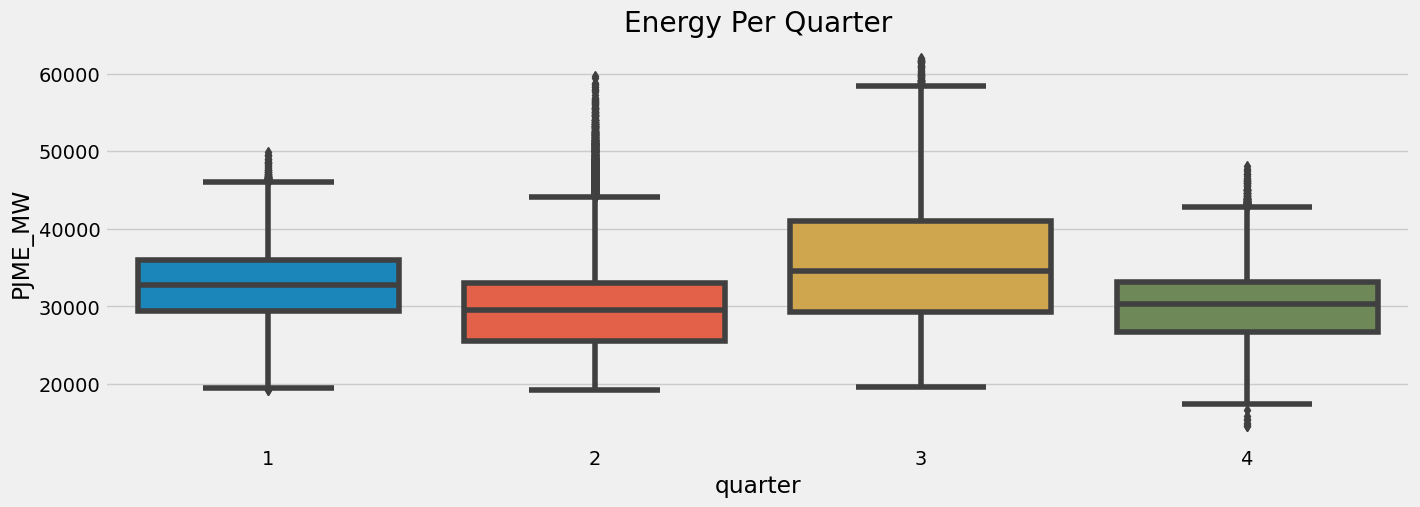

In [59]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='quarter',y='PJME_MW')
plt.title('Energy Per Quarter')

Text(0.5, 1.0, 'Energy Per Day')

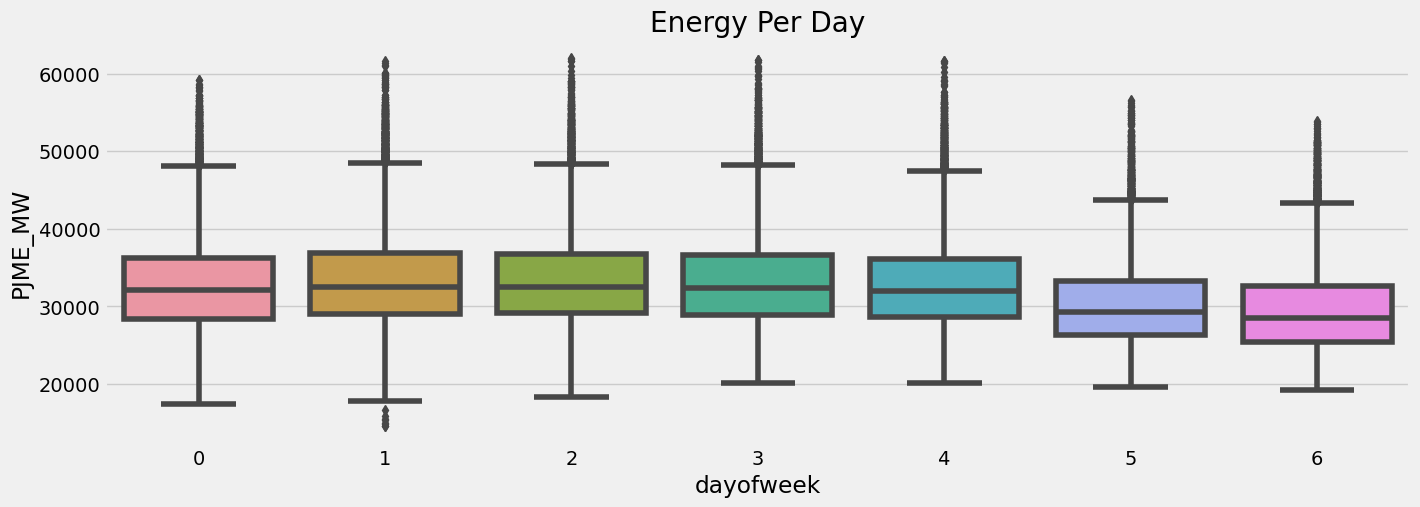

In [61]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='dayofweek',y='PJME_MW')
plt.title('Energy Per Day')

# **Model** 

In [63]:
train = df.loc[df.index<"01-01-2015"]
test = df.loc[df.index>="01-01-2015"]

/tmp/ipykernel_32/1255574415.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("train","test")


Text(0.5, 1.0, 'Train Test Split')

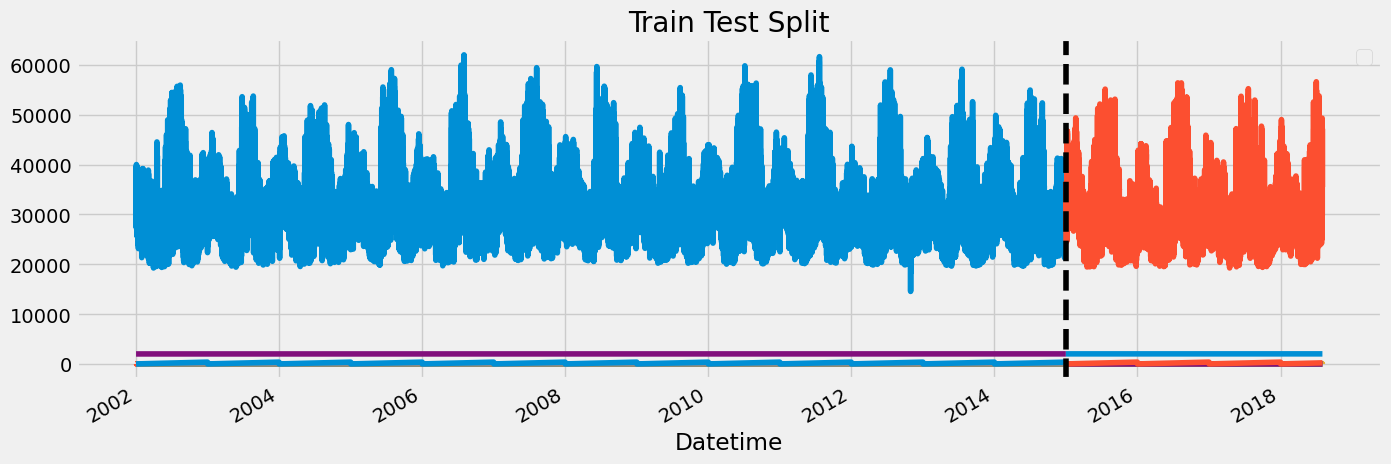

In [76]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline("01-01-2015",color='black',ls='--')
plt.legend("train","test")
plt.title('Train Test Split')

In [77]:
df

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [78]:
xtrain = train.drop('PJME_MW',axis=1)
ytrain =train['PJME_MW']


xtest = test.drop('PJME_MW',axis=1)
ytest = test['PJME_MW']

In [86]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

In [87]:
model.fit(xtrain,ytrain)

[16:37:54] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [88]:
model.score(xtrain,ytrain)

0.9339877047391292

In [90]:
p1 = model.predict(xtest)
p1

array([30874.492, 29815.238, 29193.496, ..., 34791.848, 32747.705,
       33170.027], dtype=float32)

In [92]:
mean_squared_error(p1,ytest)

18337906.9949062

In [93]:
np.sqrt(mean_squared_error(p1,ytest))

4282.278248188247